In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import h5py

import tensorflow as tf
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
# from skymapper import Map, projection

from msfm.grid_pipeline import GridPipeline
from msfm.utils import logger, input_output, files

23-09-05 06:42:12    scales.py INF   Setting up healpy to run on 256 CPUs 


In [4]:
n_side = 512
n_pix = hp.nside2npix(n_side)

In [9]:
grid_pipeline = GridPipeline(
    with_lensing=True,
    with_clustering=True,
    with_padding=True,
    apply_norm=True,
    z_bin_inds=[0,4],
)

grid_dset = grid_pipeline.get_dset(
    tfr_pattern = "/pscratch/sd/a/athomsen/DESY3/v4/large_scales/tfrecords/grid/DESy3_grid_000.tfrecord",
    n_noise=3,
    local_batch_size="cosmo",
    # local_batch_size=9,
    n_readers=1,
    n_prefetch=0,
)


23-09-05 06:43:33     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-09-05 06:43:33     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-09-05 06:43:33 grid_pipelin INF   Interleaving with n_readers = 1 
23-09-05 06:43:33 grid_pipelin INF   The dset is batched by cosmology 
23-09-05 06:43:33 grid_pipelin INF   Batching into 48 elements locally 
23-09-05 06:43:33 grid_pipelin WAR   Tracing _augmentations 
23-09-05 06:43:33 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'i_sobol', 'i_example', 'kg', 'dg', 'i_noise']) 
23-09-05 06:43:33 grid_pipelin WAR   Discarding all redshift bins except [0 4] 
23-09-05 06:43:33 grid_pipelin INF   Successfully generated the fiducial training set with element_spec (TensorSpec(shape=(None, 464896, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32,

In [10]:
for data_vectors, cosmo, index in grid_dset:
    print(index[0].numpy(), index[1].numpy(), index[2].numpy())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1] [ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15] [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2] [ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15] [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3] [ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15] [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1

In [15]:
for data_vectors, cosmo, index in grid_dset.take(1):
    print(data_vectors.shape)    
    

(16, 464896, 2)


In [13]:
sobol_indices = []
noise_indices = []
for data_vectors, cosmo, index in grid_dset:
    print(index)
    sobol_indices.append(index[0])
    noise_indices.append(index[1])
    
    

(<tf.Tensor: shape=(16,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>, <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>, <tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])>)
(<tf.Tensor: shape=(16,), dtype=int64, numpy=array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])>, <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>, <tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])>)
(<tf.Tensor: shape=(16,), dtype=int64, numpy=array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])>, <tf.Tensor: shape=(16,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>, <tf.Tensor: shape=(16,), dtype=int64, numpy=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,

In [8]:
sobol_indices = np.concatenate(sobol_indices, axis=0)
noise_indices = np.concatenate(noise_indices, axis=0)

# combined probes

23-06-09 06:53:20     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-06-09 06:53:20     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 


2023-06-09 06:53:20.862727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 06:53:21.368022: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38219 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


23-06-09 06:53:21 grid_pipelin INF   Batching into 1 elements locally 
23-06-09 06:53:22 grid_pipelin WAR   Tracing _augmentations 
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23-06-09 06:53:23 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'kg', 'sn', 'dg']) 
23-06-09 06:

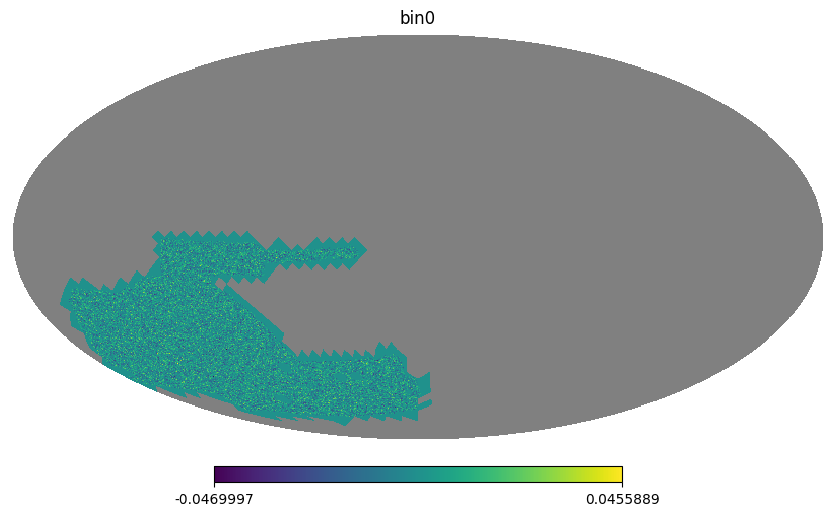

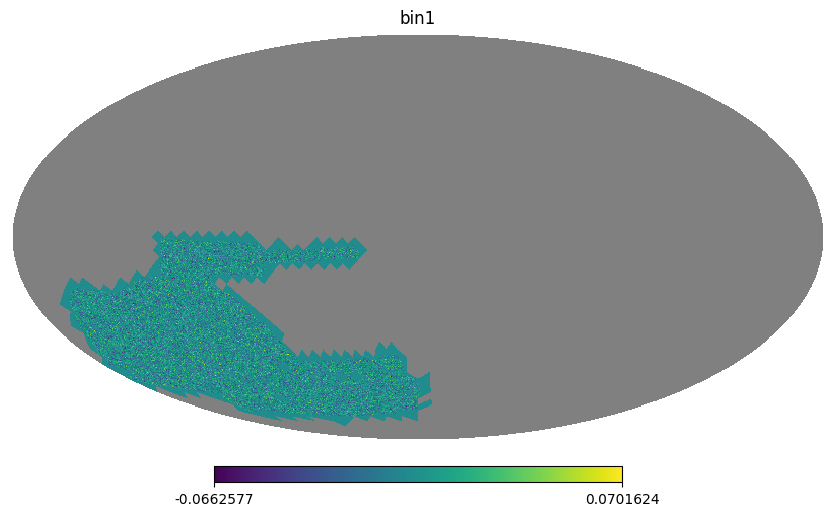

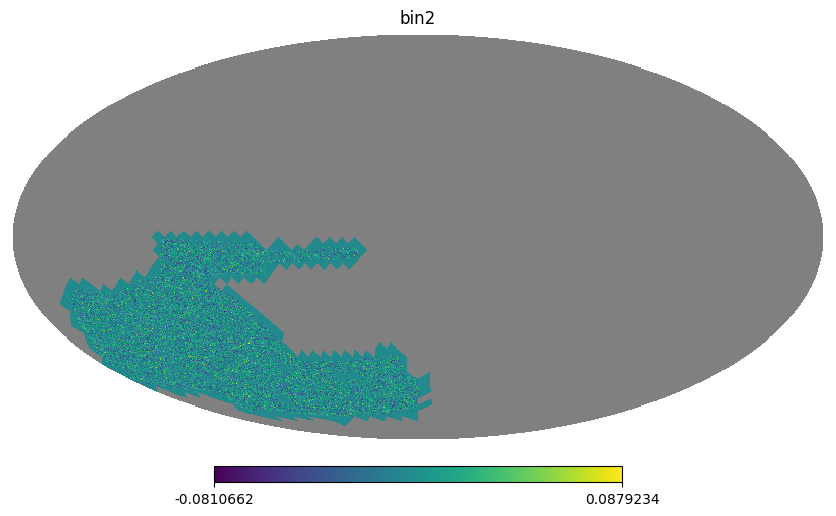

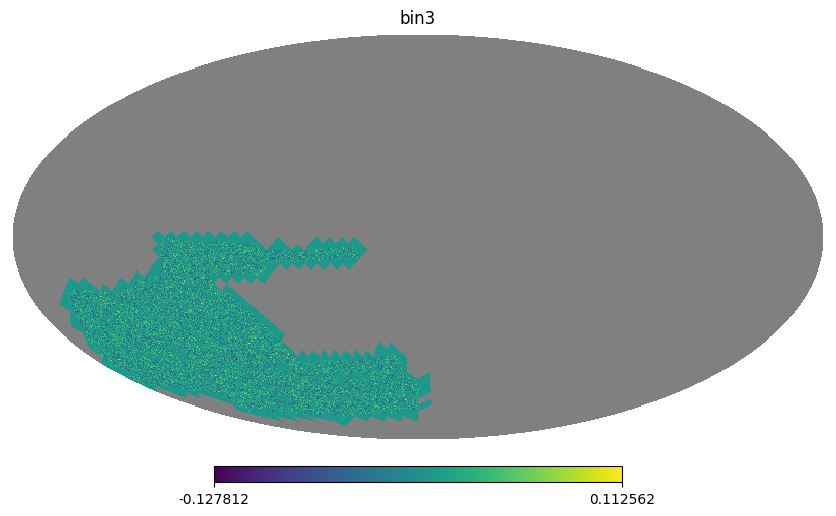

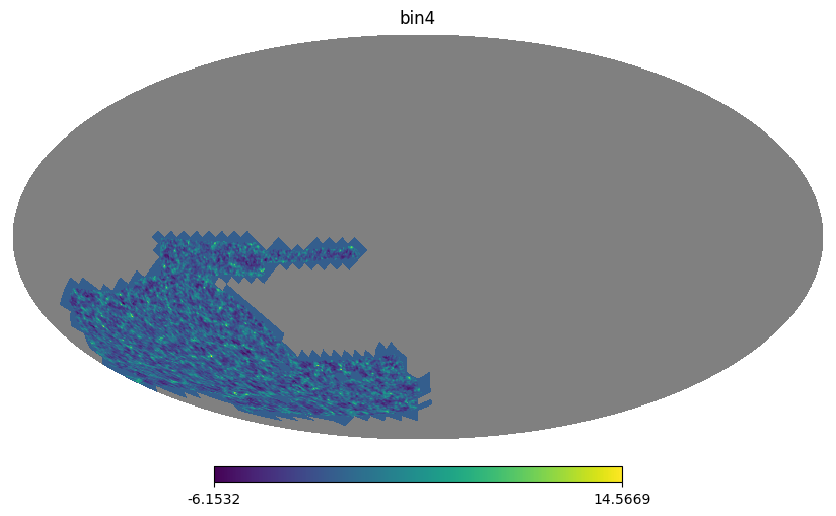

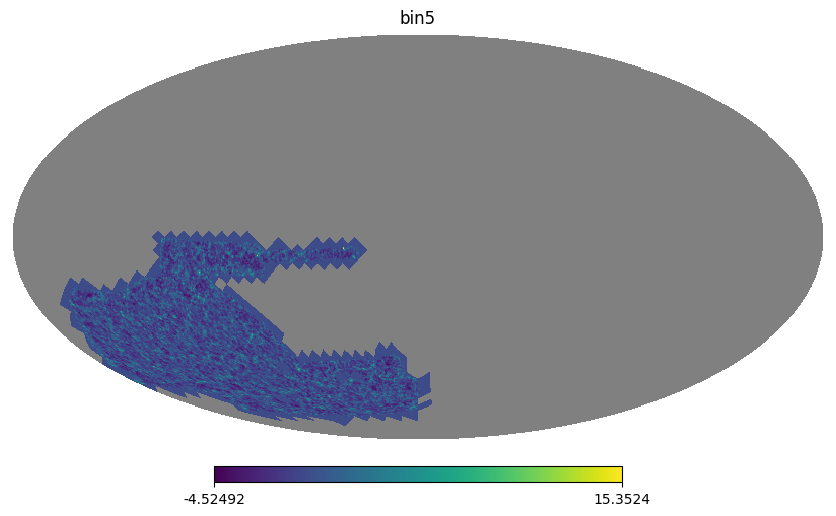

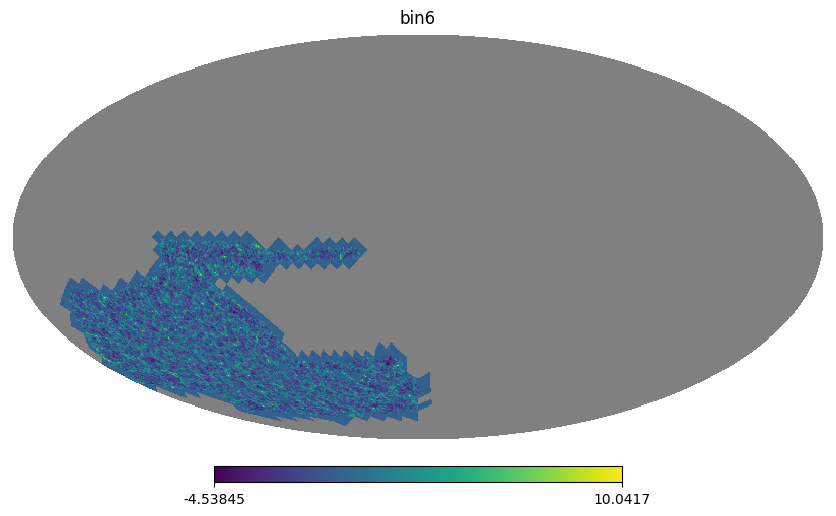

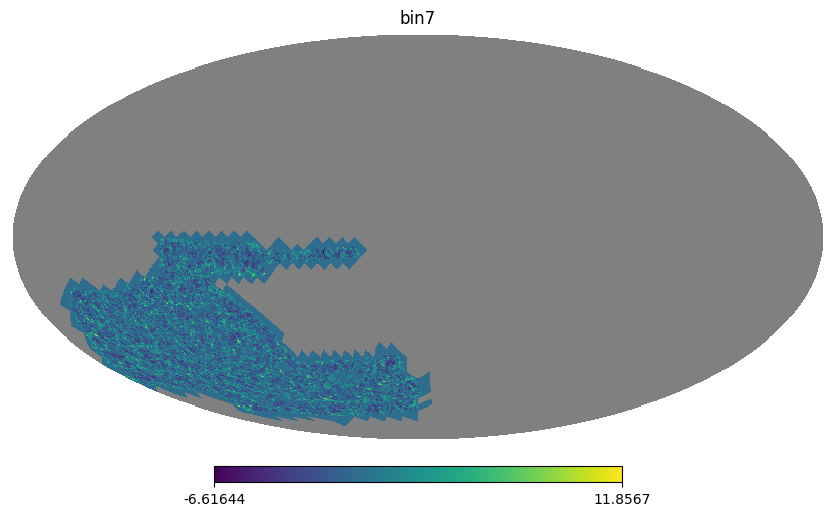

In [4]:
grid_pipeline = GridPipeline(
    with_lensing=True,
    with_clustering=True,
    with_padding=True,
    apply_norm=False
)

grid_dset = grid_pipeline.get_dset(
    tfr_pattern="/pscratch/sd/a/athomsen/DESY3/v3/grid/DESy3_grid_???.tfrecord",
    local_batch_size=1,
    n_readers=1,
    n_prefetch=None,
)

for data_vectors, cosmo, index in grid_dset.take(1):
    print(data_vectors.shape)
    print(cosmo.shape)
    print(index)
    
i_batch = 0

for i in range(data_vectors.shape[-1]):
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[grid_pipeline.data_vec_pix] = data_vectors[i_batch,:,i]
    hp.mollview(hp_map, nest=True, title=f"bin{i}")

In [ ]:
grid_pipeline = GridPipeline(
    with_lensing=True,
    with_clustering=True,
    with_padding=False,
    apply_norm=False
)

grid_dset = grid_pipeline.get_dset(
    tfr_pattern="/pscratch/sd/a/athomsen/DESY3/v3/grid/DESy3_grid_???.tfrecord",
    local_batch_size=1,
    n_readers=1,
    n_prefetch=None,
)

for data_vectors, cosmo, index in grid_dset.take(1):
    print(data_vectors.shape)
    print(cosmo.shape)
    print(index)
    
i_batch = 0

for i in range(data_vectors.shape[-1]):
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[grid_pipeline.patch_pix] = data_vectors[i_batch,:,i]
    hp.mollview(hp_map, nest=True, title=f"bin{i}")

23-06-09 06:51:24     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-06-09 06:51:24     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 


# save a figure

23-06-09 07:22:31     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-06-09 07:22:31     files.py INF   Loaded the pixel file /global/u2/a/athomsen/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5 
23-06-09 07:22:31 grid_pipelin INF   Batching into 1 elements locally 
23-06-09 07:22:31 grid_pipelin WAR   Tracing _augmentations 
23-06-09 07:22:31 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'kg', 'sn', 'dg']) 
23-06-09 07:22:31 grid_pipelin INF   Removing the padding 
23-06-09 07:22:31 grid_pipelin INF   Successfully generated the grid set with element_spec (TensorSpec(shape=(None, None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))) for i_noise = 0 
(1, 369764, 8)
(1, 10)
(<tf.Tensor: shape=(1,), dtype=int64, numpy=

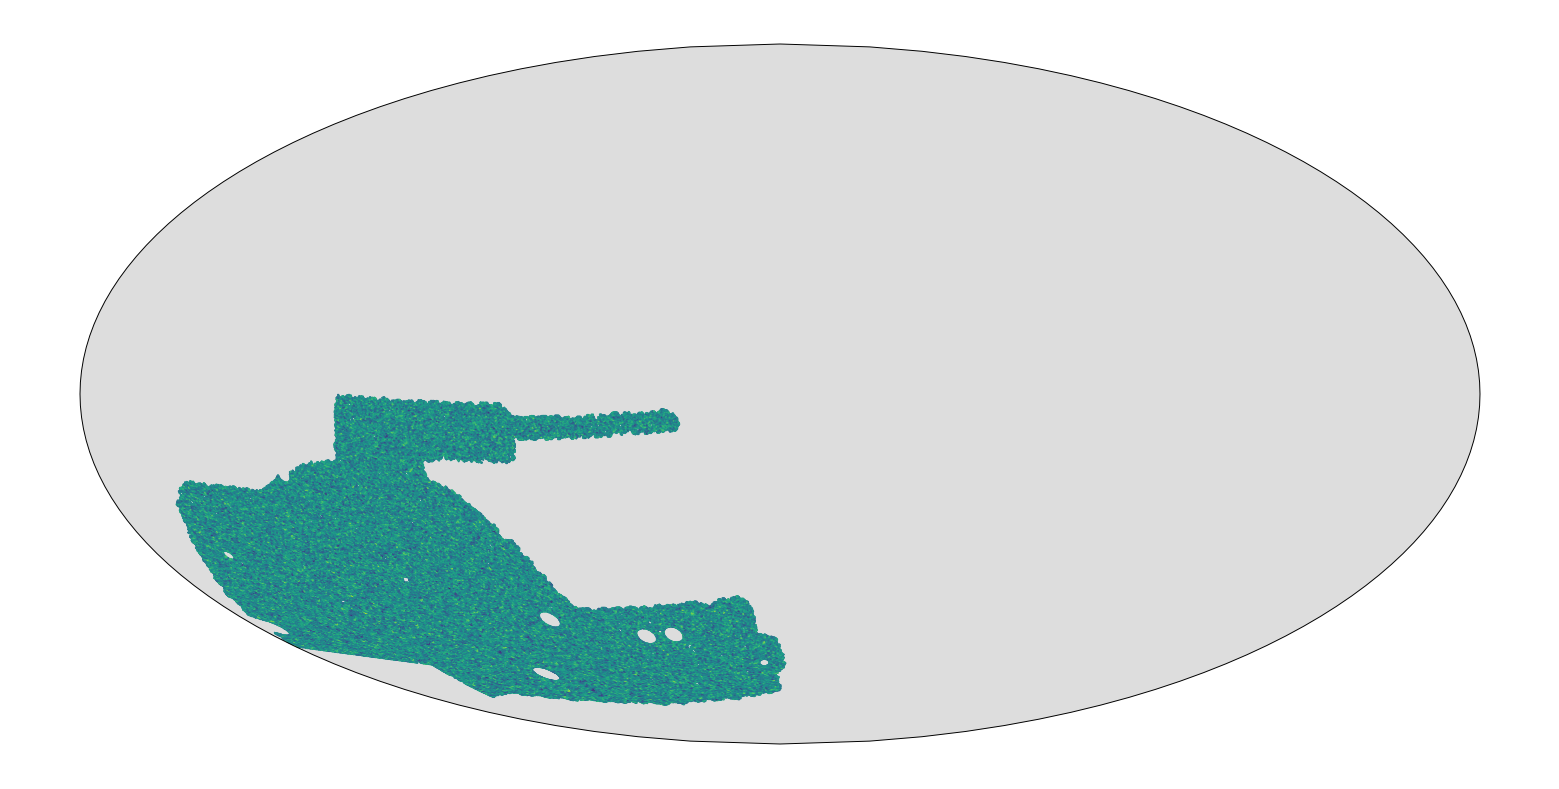

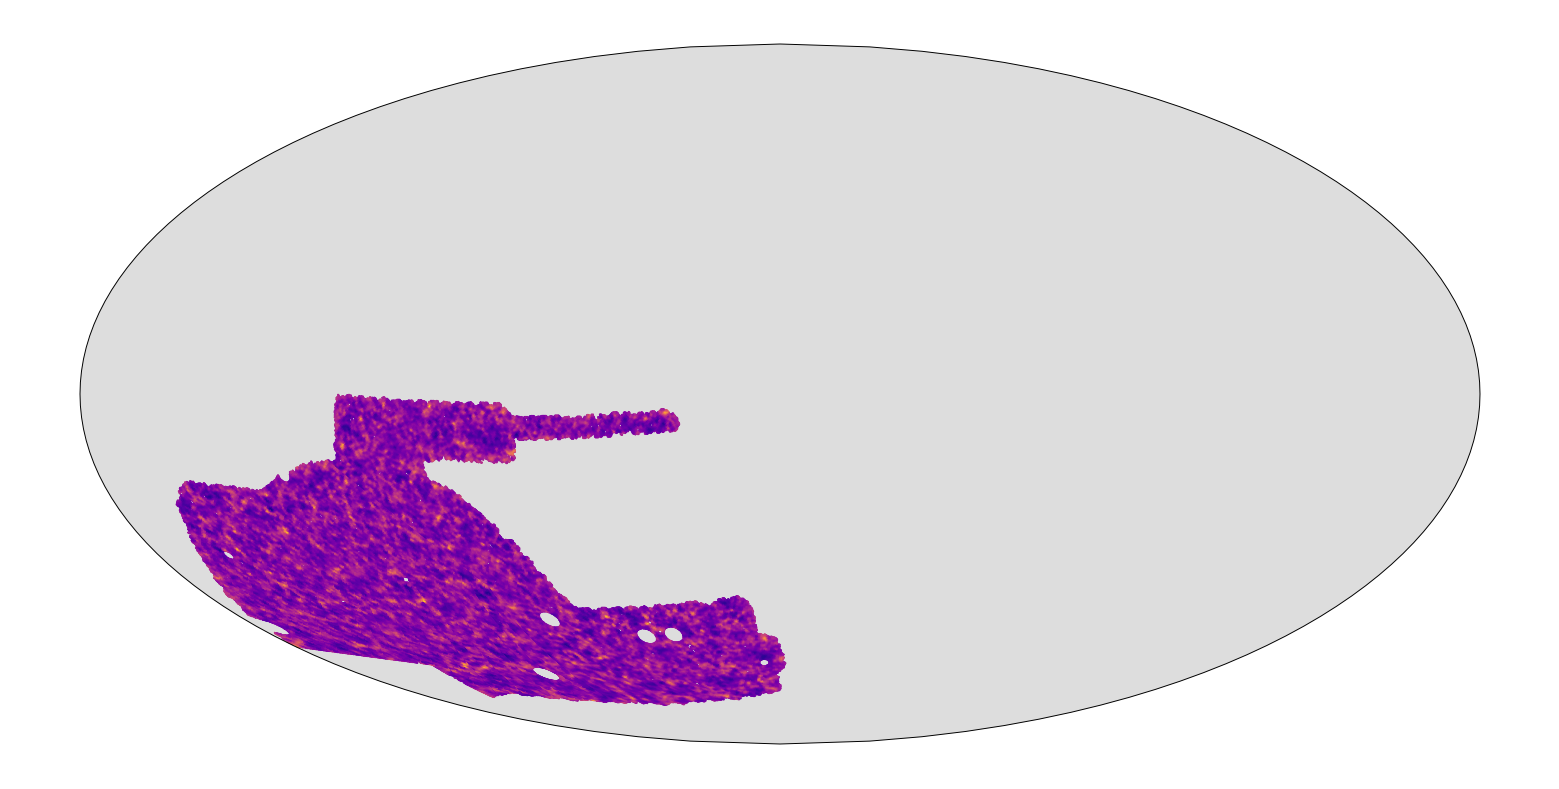

In [14]:
grid_pipeline = GridPipeline(
    with_lensing=True,
    with_clustering=True,
    with_padding=False,
    apply_norm=False
)

grid_dset = grid_pipeline.get_dset(
    tfr_pattern="/pscratch/sd/a/athomsen/DESY3/v3/grid/DESy3_grid_???.tfrecord",
    local_batch_size=1,
    n_readers=1,
    n_prefetch=None,
)

for data_vectors, cosmo, index in grid_dset.take(1):
    print(data_vectors.shape)
    print(cosmo.shape)
    print(index)
    
i_batch = 0

# lensing
i_tomo = 0

hp_map = np.full(n_pix, hp.UNSEEN)
hp_map[grid_pipeline.patch_pix] = data_vectors[i_batch,:,i_tomo]

temp = np.ma.masked_where(hp_map==hp.UNSEEN, hp_map)
moll = Map(projection.Mollweide())
moll.healpix(temp, cmap="viridis", nest=True, color_percentiles=[0,100])

moll.fig.set_size_inches(16, 8)
moll.fig.savefig("lensing_example.png", bbox_inches="tight", dpi=300)

# clustering
i_tomo = 4

hp_map = np.full(n_pix, hp.UNSEEN)
hp_map[grid_pipeline.patch_pix] = data_vectors[i_batch,:,i_tomo]

temp = np.ma.masked_where(hp_map==hp.UNSEEN, hp_map)
moll = Map(projection.Mollweide())
moll.healpix(temp, cmap="plasma", nest=True, color_percentiles=[0,100])

moll.fig.set_size_inches(16, 8)
moll.fig.savefig("clustering_example.png", bbox_inches="tight", dpi=300)



# old

# lensing only

23-05-03 10:02:10 grid_pipelin INF   Starting to generate the grid data set for i_noise = 0 
23-05-03 10:02:10  analysis.py INF   Loaded the config 
23-05-03 10:02:10  analysis.py INF   Loaded the config 
/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 10:02:10  analysis.py INF   Loaded the pixel file 
23-05-03 10:02:10  analysis.py INF   Loaded the config 
/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 10:02:10  analysis.py INF   Loaded the pixel file 
23-05-03 10:02:10 grid_pipelin INF   Batching into 1 elements locally 
23-05-03 10:02:10 grid_pipelin WAR   Tracing dset_augmentations 
23-05-03 10:02:10 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'kg', 'sn']) 
23-05-03 10:02:10 grid_pipelin INF   Successfully generated the grid set with element_spec (TensorSpec(shape=(None, 475136, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None,

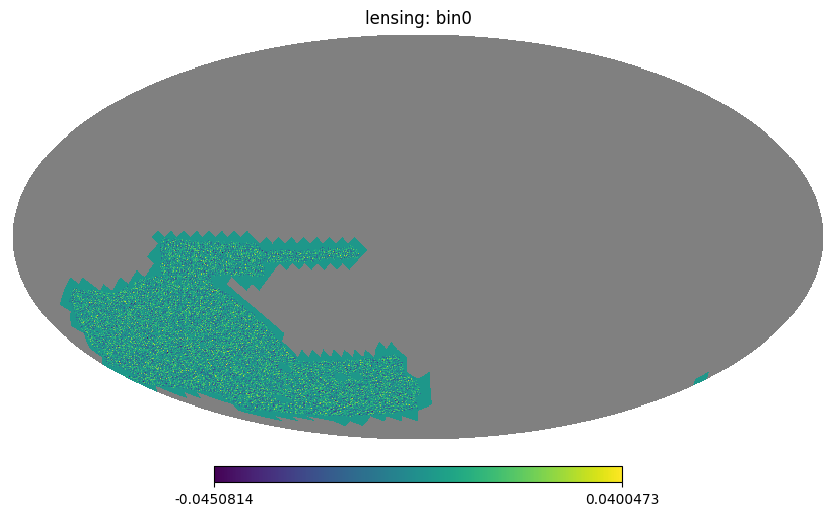

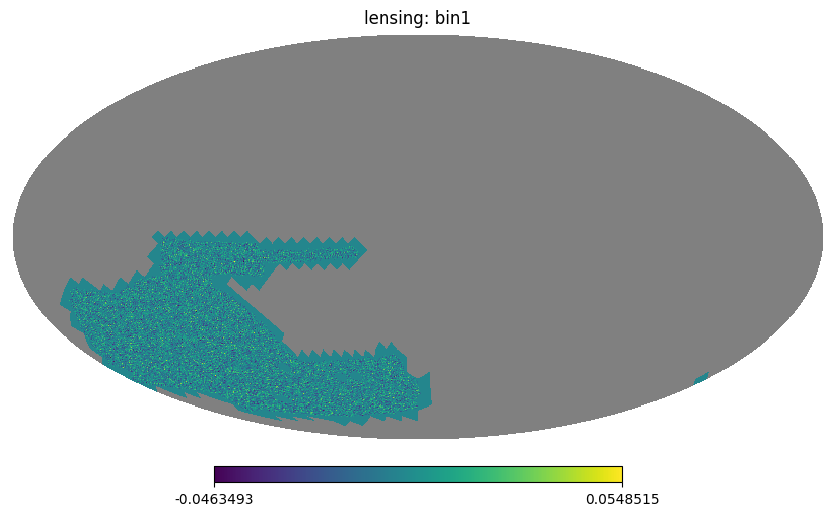

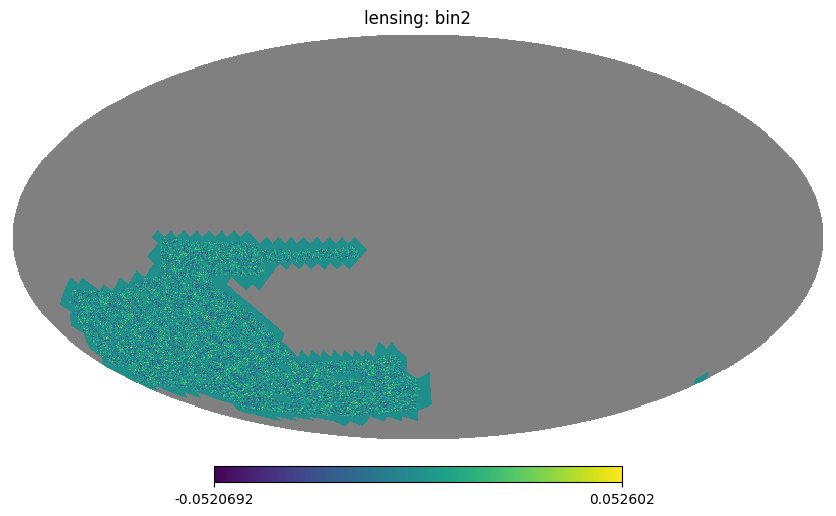

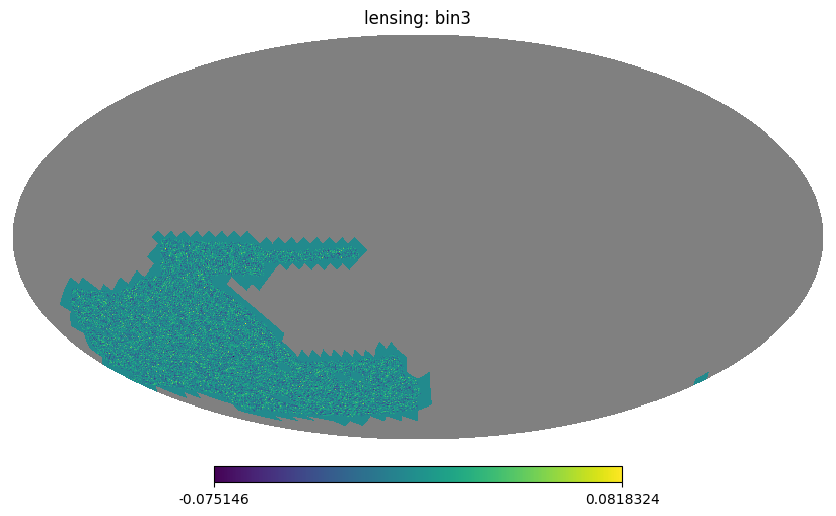

In [7]:
grid_dset = grid_pipeline.get_grid_dset(
    tfr_pattern="/cluster/scratch/athomsen/CosmoGrid/debug/v3/grid/DESy3_grid_???.tfrecord",
    local_batch_size=1,
    n_readers=1,
    n_prefetch=1,
    with_clustering=False,
)

for data_vectors, cosmo, index in grid_dset.take(1):
    print(data_vectors.shape)
    print(cosmo.shape)
    print(index)
    
# loop over the tomographic bin
map_type = "lensing"
for i in range(4):        
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = data_vectors[0,:,i]
    hp.mollview(hp_map, nest=True, title=f"{map_type}: bin{i}")

# clustering only

23-05-03 10:02:16 grid_pipelin INF   Starting to generate the grid data set for i_noise = 0 
23-05-03 10:02:16  analysis.py INF   Loaded the config 
23-05-03 10:02:16  analysis.py INF   Loaded the config 
/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 10:02:16  analysis.py INF   Loaded the pixel file 
23-05-03 10:02:16  analysis.py INF   Loaded the config 
/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 10:02:16  analysis.py INF   Loaded the pixel file 
23-05-03 10:02:16 grid_pipelin INF   Batching into 1 elements locally 
23-05-03 10:02:16 grid_pipelin WAR   Tracing dset_augmentations 
23-05-03 10:02:16 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'dg']) 
23-05-03 10:02:16 grid_pipelin INF   Successfully generated the grid set with element_spec (TensorSpec(shape=(None, 475136, 6), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), 

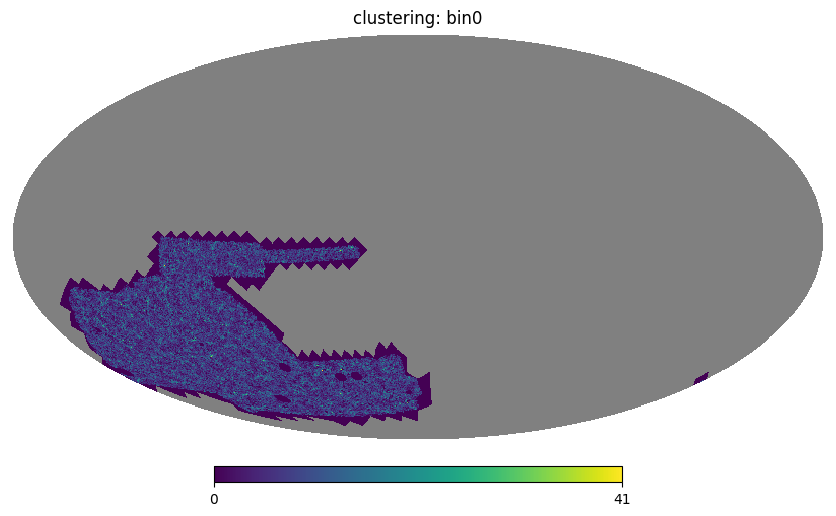

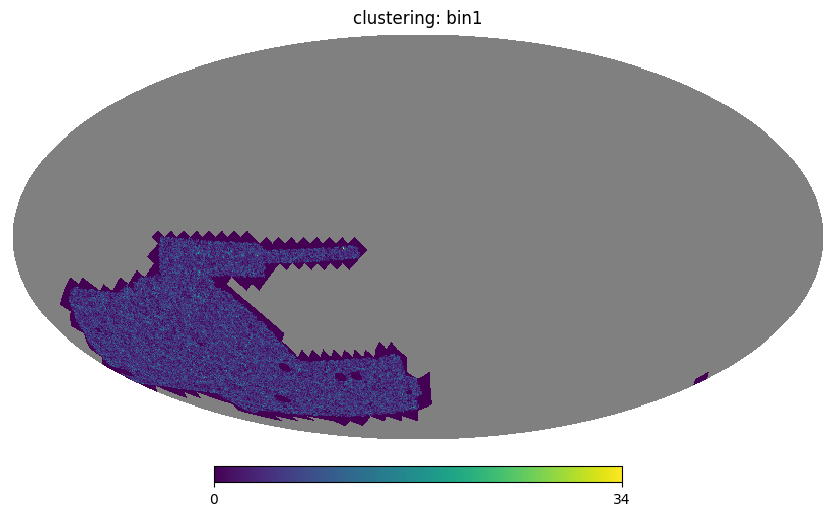

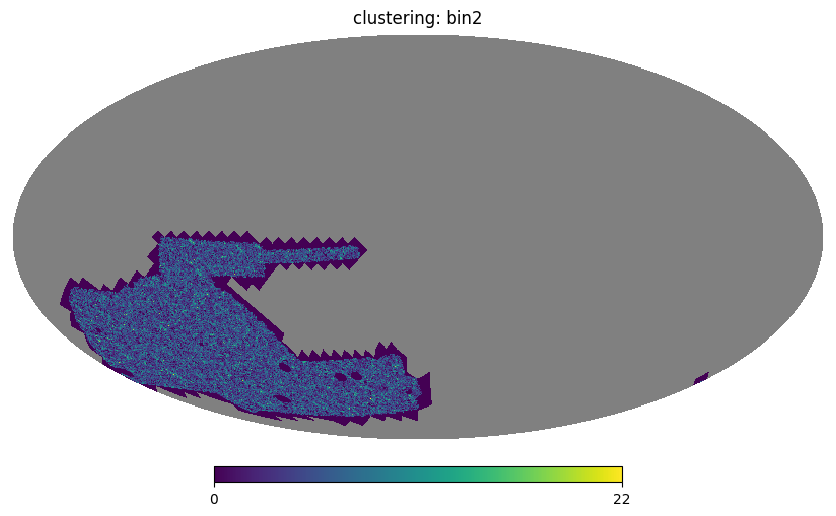

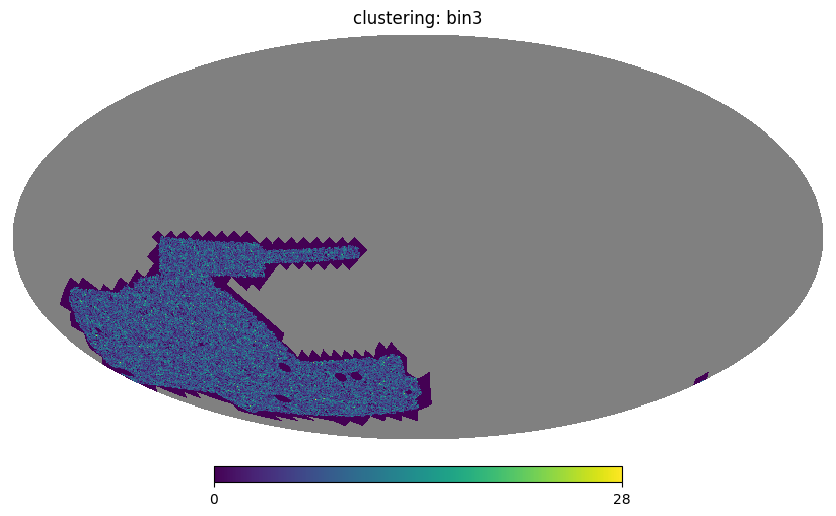

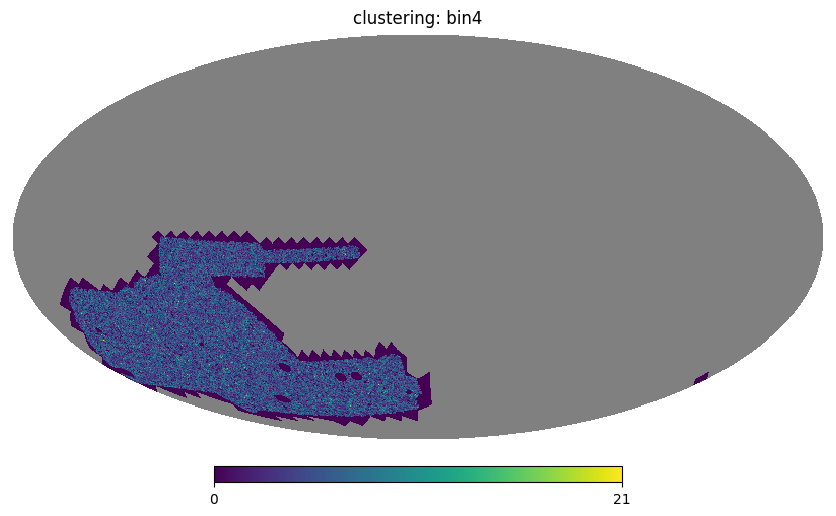

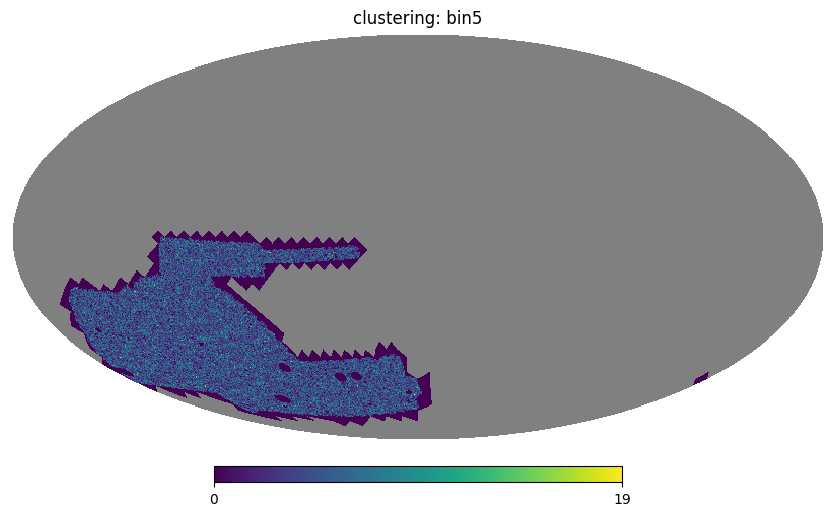

In [8]:
grid_dset = grid_pipeline.get_grid_dset(
    tfr_pattern="/cluster/scratch/athomsen/CosmoGrid/debug/v3/grid/DESy3_grid_???.tfrecord",
    local_batch_size=1,
    n_readers=1,
    n_prefetch=1,
    with_lensing=False,
)

for data_vectors, cosmo, index in grid_dset.take(1):
    print(data_vectors.shape)
    print(cosmo.shape)
    print(index)
    
# loop over the tomographic bin
map_type = "clustering"
for i in range(6):        
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = data_vectors[0,:,i]
    hp.mollview(hp_map, nest=True, title=f"{map_type}: bin{i}")

In [13]:
grid_dset = grid_pipeline.get_grid_dset(
    tfr_pattern="/cluster/scratch/athomsen/CosmoGrid/debug/v3/grid/DESy3_grid_???.tfrecord",
    local_batch_size=1,
    n_params=10,
    n_readers=1,
    n_prefetch=1,
)

for data_vectors, cosmo, index in grid_dset.take(5):
    print(cosmo)

23-05-03 10:05:03 grid_pipelin INF   Starting to generate the grid data set for i_noise = 0 
23-05-03 10:05:03  analysis.py INF   Loaded the config 
23-05-03 10:05:03  analysis.py INF   Loaded the config 
/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 10:05:03  analysis.py INF   Loaded the pixel file 
23-05-03 10:05:03  analysis.py INF   Loaded the config 
/cluster/home/athomsen/py3_10/repos/multiprobe-simulation-forward-model/data/DESY3_pixels_512.h5
23-05-03 10:05:03  analysis.py INF   Loaded the pixel file 
23-05-03 10:05:04 grid_pipelin INF   Batching into 1 elements locally 
23-05-03 10:05:04 grid_pipelin WAR   Tracing dset_augmentations 
23-05-03 10:05:04 grid_pipelin INF   Running on the data_vectors.keys() = dict_keys(['cosmo', 'kg', 'sn', 'dg']) 
23-05-03 10:05:04 grid_pipelin INF   Successfully generated the grid set with element_spec (TensorSpec(shape=(None, 475136, 10), dtype=tf.float32, name=None), TensorSpec(shape

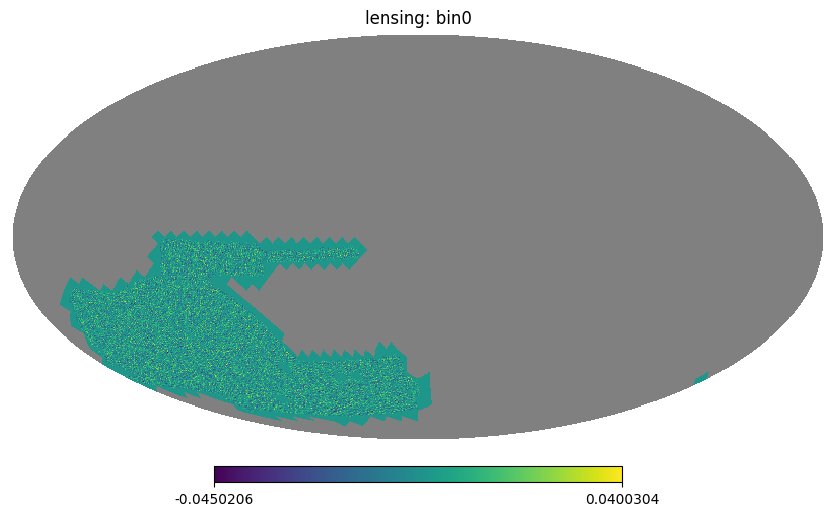

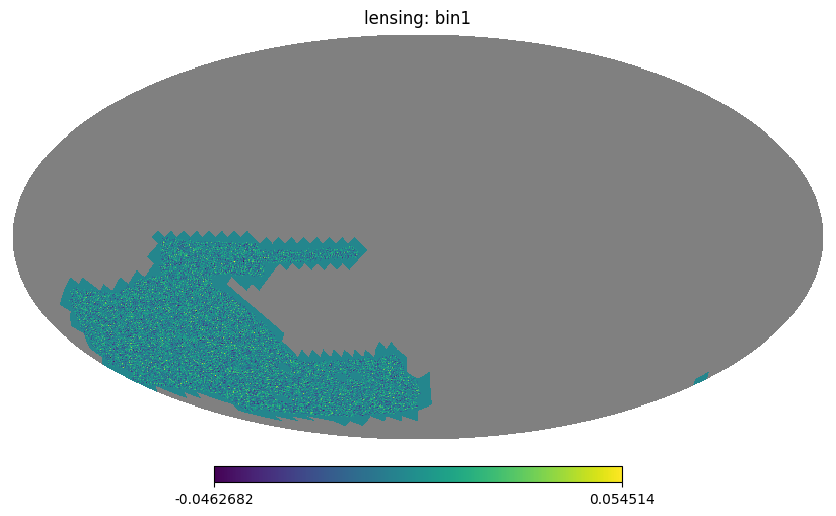

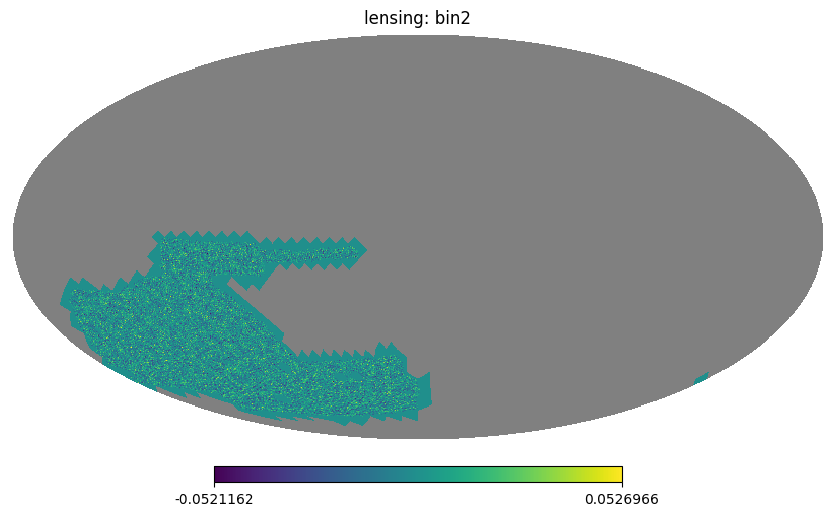

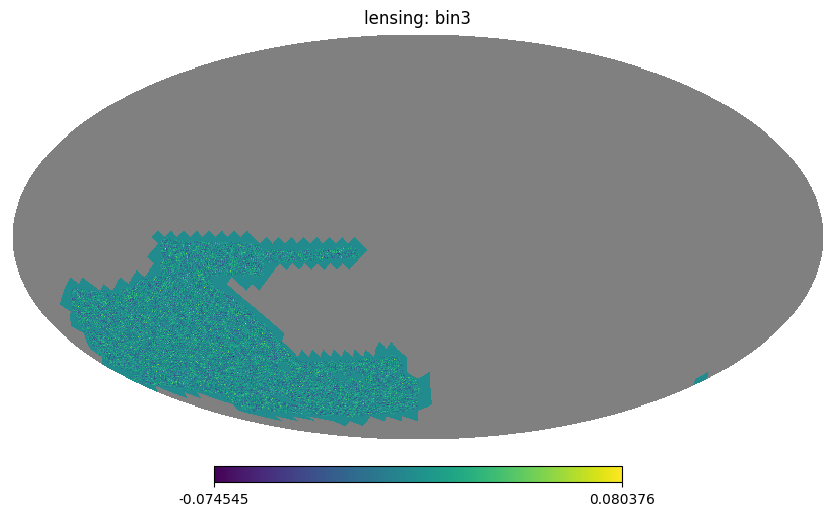

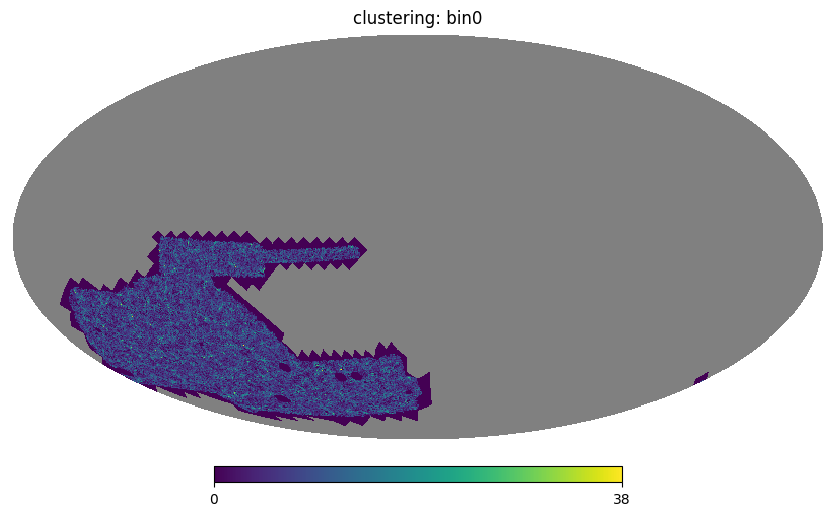

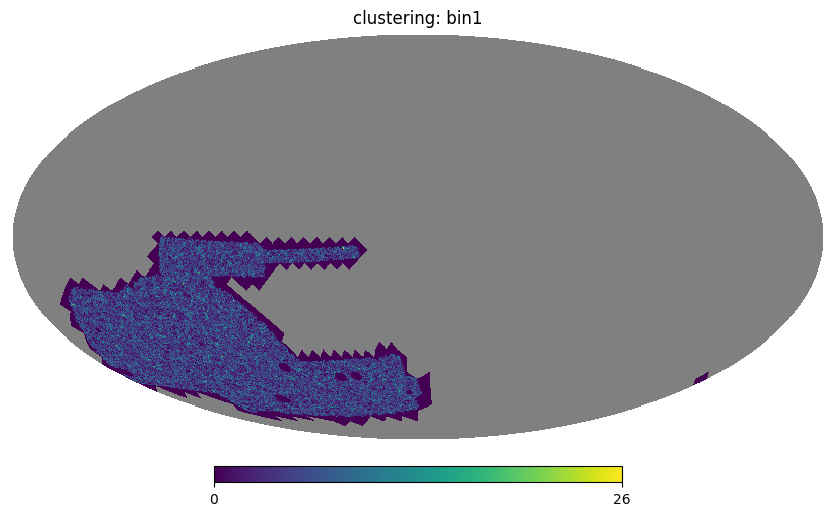

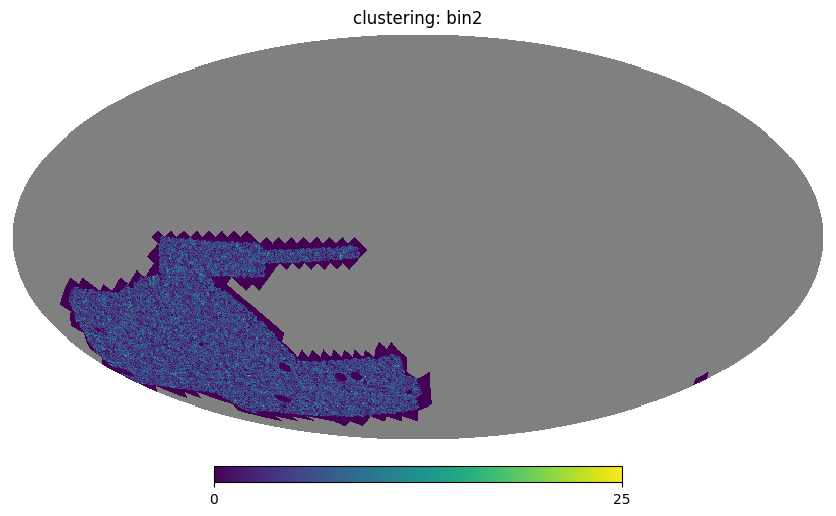

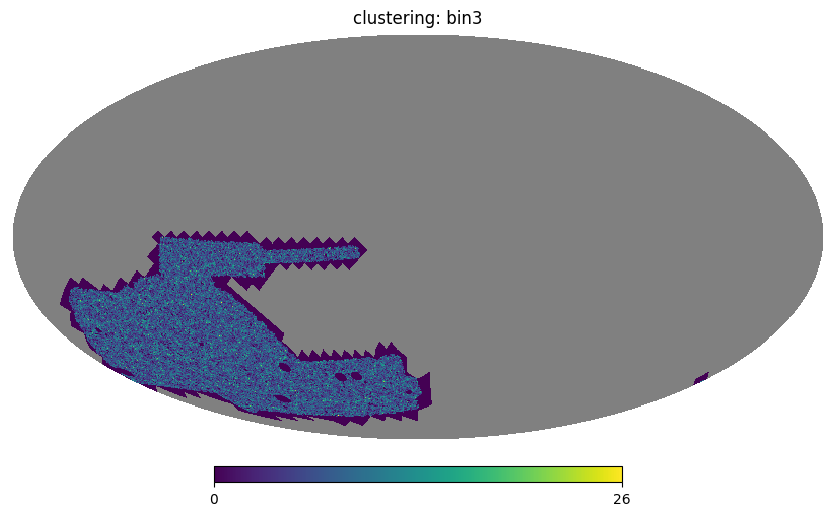

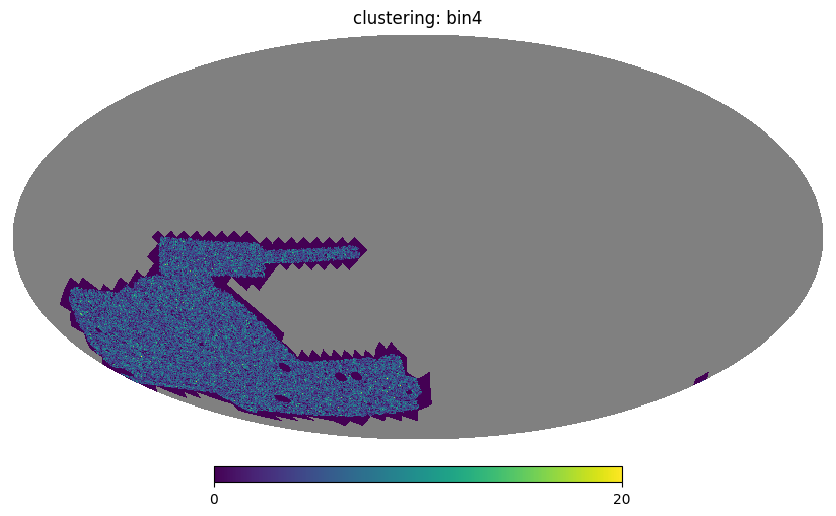

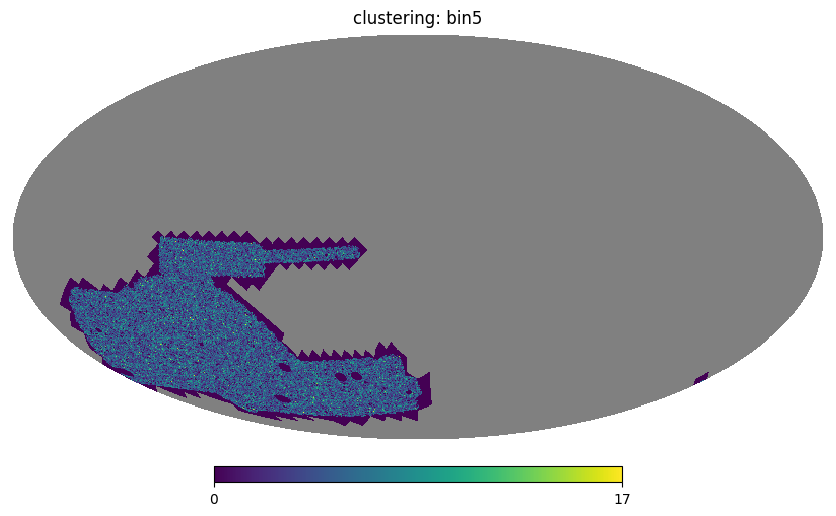

In [16]:
# loop over the tomographic bin/map type
for i in range(10):
    if i < 4:
        map_type = "lensing"
        i_tomo = i
    else:
        map_type = "clustering"
        i_tomo = i - 4
        
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = data_vectors[0,:,i]
    hp.mollview(hp_map, nest=True, title=f"{map_type}: bin{i_tomo}")    

In [31]:
LOGGER = logger.get_logger(".")

tfr_pattern = "/cluster/work/refregier/athomsen/CosmoGrid/DESY3/v2/DESy3_grid_???.tfrecord"

# for metacal
n_z_bins = 4
# corresponds to one cosmology as there are 4 sims per cosmology and 4 patches per full sky map
batch_size = 32

# these are not optimized for performance
examples_shuffle_buffer = 10
n_readers = 1
n_prefetch = 3
n_batches = 7

In [25]:
dset = grid_pipeline.get_grid_dset(tfr_pattern, batch_size, n_readers=n_readers, n_prefetch=n_prefetch)

23-03-07 14:09:41 grid_pipelin INF   Starting to generate the grid data set for i_noise = 0 
23-03-07 14:09:41  analysis.py INF   Loaded the config 
23-03-07 14:09:41  analysis.py INF   Loaded the pixel file 
23-03-07 14:09:41  analysis.py INF   Loaded the config 
23-03-07 14:09:41  analysis.py INF   Loaded the pixel file 
23-03-07 14:09:42  analysis.py INF   Loaded the config 
23-03-07 14:09:42  analysis.py INF   Loaded the config 
23-03-07 14:09:42 grid_pipelin WAR   Tracing dset_add_bias 
23-03-07 14:09:42 grid_pipelin WAR   Tracing dset_add_noise 
23-03-07 14:09:42 grid_pipelin INF   Batching into 32 elements locally 
23-03-07 14:09:42 grid_pipelin INF   Successfully generated the grid set with element_spec (TensorSpec(shape=(None, 463872, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), (TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))) for i_noise = 0 


In [48]:
results = []
for data_vectors, cosmo, index in dset.take(n_batches):
    results.append(index[0])
    
temp = tf.concat(results, axis=0)
print(temp.shape)

(224,)


In [49]:
temp = tf.split(temp, batch_size * n_batches // 16, axis=0)
temp = tf.stack(temp, axis=0)
print(temp.shape)

(14, 16)


In [34]:
32*7//16

14

In [23]:
for i in range(5):
    print(temp[i,:,0])

tf.Tensor([73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73. 73.], shape=(16,), dtype=float32)
tf.Tensor(
[68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5 68.5
 68.5 68.5], shape=(16,), dtype=float32)
tf.Tensor(
[77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5
 77.5 77.5], shape=(16,), dtype=float32)
tf.Tensor(
[66.25 66.25 66.25 66.25 66.25 66.25 66.25 66.25 66.25 66.25 66.25 66.25
 66.25 66.25 66.25 66.25], shape=(16,), dtype=float32)
tf.Tensor(
[70.75 70.75 70.75 70.75 70.75 70.75 70.75 70.75 70.75 70.75 70.75 70.75
 70.75 70.75 70.75 70.75], shape=(16,), dtype=float32)


In [45]:
i = 0
for data_vectors, cosmo, index in dset.take(n_batches):
    x = data_vectors

In [47]:
y = x.numpy()

print(y.nbytes/32)

7421952.0


In [6]:
i = 0
for x in dset:
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [5]:
dset.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=-2>

In [5]:
for kg, cosmo, index in dset.take(1):
    print(kg.shape, cosmo.shape, len(index))

(16, 463872, 4) (16, 7) 2


In [6]:
LOGGER.timer.start("grid")

counter = 0
for kg, cosmo, index in dset:
    counter += 1
    if counter % 100 == 0:
        print(f"step {counter} after {LOGGER.timer.elapsed('grid')}")
        
print(counter)

step 100 after 0:00:15.63
step 200 after 0:00:29.71
step 300 after 0:00:51.49
step 400 after 0:01:13.55
step 500 after 0:01:36.41
step 600 after 0:01:57.91
step 700 after 0:02:19.26
step 800 after 0:02:41.13
step 900 after 0:03:04.53
step 1000 after 0:03:26.21
step 1100 after 0:03:48.64
step 1200 after 0:04:09.38
step 1300 after 0:04:31.10
step 1400 after 0:04:54.36
step 1500 after 0:05:15.94
step 1600 after 0:05:38.76
step 1700 after 0:06:00.49
step 1800 after 0:06:23.93
step 1900 after 0:06:46.23
step 2000 after 0:07:08.65
step 2100 after 0:07:30.47
step 2200 after 0:07:53.09
step 2300 after 0:08:16.54
step 2400 after 0:08:38.91
step 2500 after 0:09:01.08
2500


# plotting

In [7]:
data_vec_pix, _, _, tomo_patches_pix, tomo_corresponding_pix = survey.load_pixel_file(conf, repo_dir)
n_pix = conf["analysis"]["n_pix"]

23-02-20 13:56:17    survey.py INF   Loaded pixel file 


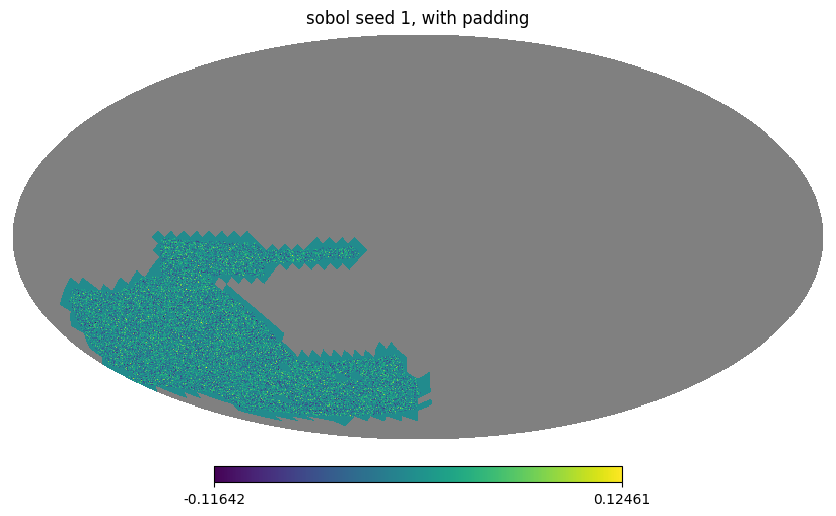

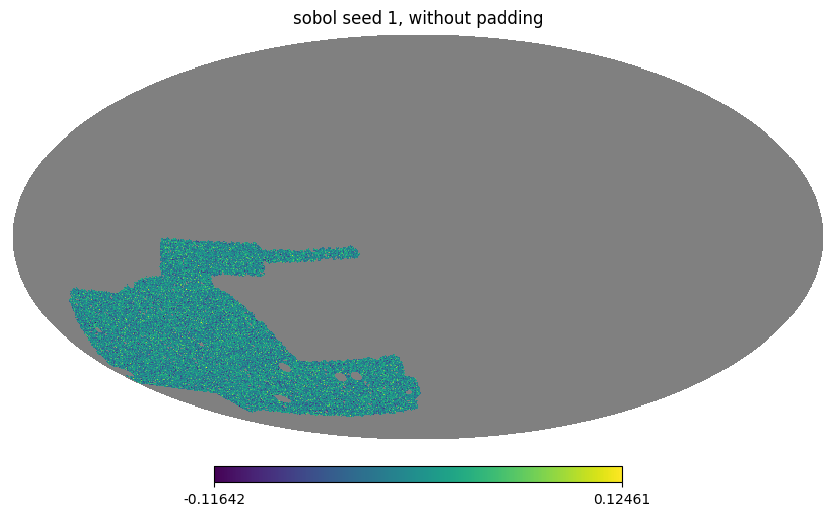

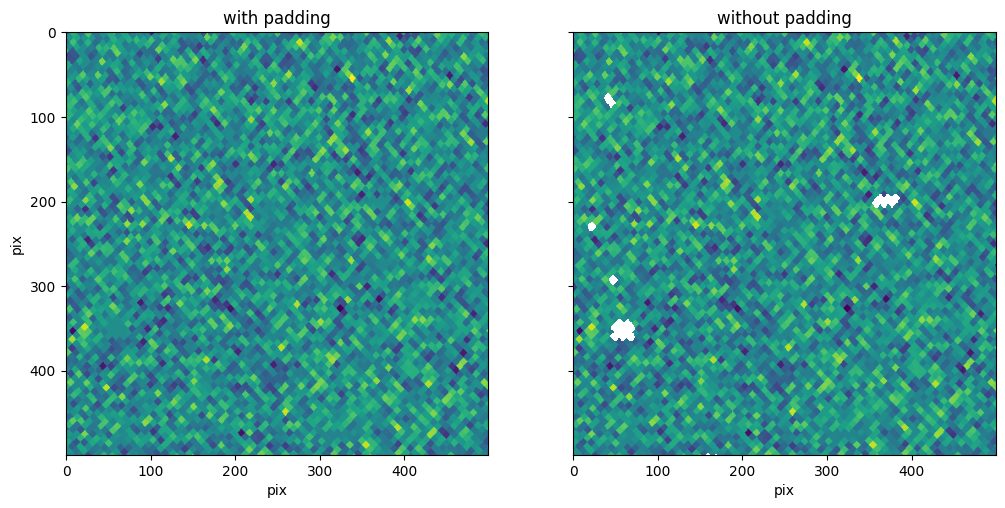

In [8]:
# map selection
i_tomo = 0
i_batch = 0

# gnomview params
square_pix = 500
reso = 1

for kg, cosmo, index in dset.take(1):
    # with padding
    padded_kg = kg.numpy()[i_batch,:,i_tomo]
    
    hp_map = np.full(n_pix, hp.UNSEEN)
    hp_map[data_vec_pix] = padded_kg
    hp.mollview(hp_map, nest=True, title=f"sobol seed {index[0][i_batch]}, with padding")
    padded_gnom = hp.gnomview(hp_map, nest=True, rot=(90, -30, 0), reso=reso, return_projected_map=True, no_plot=True, xsize=square_pix, ysize=square_pix)
    
    # without padding
    hp_map = maps.data_vec_to_map(padded_kg, n_pix, tomo_corresponding_pix[i_tomo], tomo_patches_pix[i_tomo][0])
    
    hp_map[hp_map == 0] = hp.UNSEEN
    hp.mollview(hp_map, nest=False, title=f"sobol seed {index[0][i_batch]}, without padding")
    non_padded_gnom = hp.gnomview(hp_map, nest=False, rot=(90, -30, 0), reso=reso, return_projected_map=True, no_plot=True, xsize=square_pix, ysize=square_pix)

    # combined gnomview plot, these should be identical apart from the padding
    fig, ax = plt.subplots(figsize=(12,8), ncols=2, sharex=True, sharey=True)
    ax[0].imshow(padded_gnom)
    ax[0].set(title="with padding", xlabel='pix', ylabel='pix')
    ax[1].imshow(non_padded_gnom)
    ax[1].set(title="without padding", xlabel='pix')
    
    